In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_float, io, restoration
from bm3d import bm3d

In [8]:
def fast_iterative_denoising_btb(y, f, mu_sequence, T, delta):
    """
    Fast Iterative Denoising Algorithm (BTB)

    Parameters:
        y: Input image (noisy)
        f: Denoiser function
        mu_sequence: Sequence of step sizes
        T: Maximum number of iterations
        delta: Convergence threshold

    Returns:
        x_denoised: Denoised image
    """
    x_prev = y.copy()  # Initialize previous denoised image as noisy image
    
    for t in range(T):
        x_next = f(x_prev)  # Apply denoiser function to previous denoised image
        
        # Update current denoised image using hybrid Banach contraction principle
        x_current = (1 - mu_sequence[t]) * x_prev + mu_sequence[t] * x_next
        
        # Check convergence criterion
        if np.linalg.norm(x_current - x_prev) < delta:
            break  # Stop iteration if convergence criterion is met
        
        x_prev = x_current  # Update previous denoised image
        
    return x_current

In [3]:
img_path = "/home/mint/Repo/Denoiser-Implementation/eye.jpg"

image = cv2.imread(img_path, cv2.IMREAD_COLOR)

noisy_image = img_as_float(image)

In [4]:
def denoiser_bm3d(image):
    return bm3d(image, 0.2)

In [5]:
mu_sequence = np.linspace(0.1, 0.1, 10)
T = 10
delta = 1e-4

# Apply the Fast Iterative Denoising Algorithm (BTB)
denoised_image = fast_iterative_denoising_btb(noisy_image, denoiser_bm3d, mu_sequence, T, delta)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.1425274257317996e-09..0.8969602166072659].


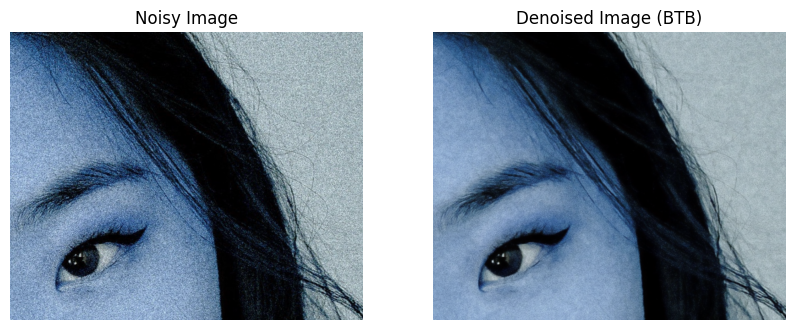

In [6]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image (BTB)')
plt.axis('off')

plt.show()

In [7]:
e = np.linspace(0.1, 0.05, 8)
e

array([0.1       , 0.09285714, 0.08571429, 0.07857143, 0.07142857,
       0.06428571, 0.05714286, 0.05      ])